<a href="https://colab.research.google.com/github/Vonewman/Algorithme/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equation normal

In [0]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x0 + bruit gaussien
# 
X_b = np.c_[np.ones((100, 1)), X] # ajouter x0 = 1 à chaque observation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Calcul de theta à l'aide de l'équation normale

In [23]:
theta_best

array([[3.97844213],
       [2.99810348]])

# Prédiction à l'aide de theta

In [24]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # ajouter x = 1 à chaque obs
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.97844213],
       [9.9746491 ]])

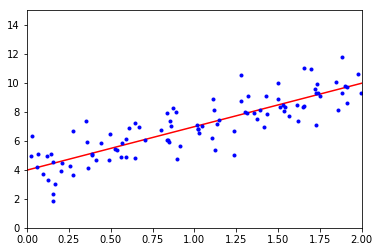

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Le code implémenter avec scikit-learn

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()    # création du modèle linéaire
lin_reg.fit(X, y)            # entrainement du modèle
lin_reg.intercept_, lin_reg.coef_

(array([3.97844213]), array([[2.99810348]]))

In [27]:
lin_reg.predict(X_new) # efectuer des prédictions

array([[3.97844213],
       [9.9746491 ]])

# Descente de Gradient

***normalisation avec Numpy***

In [0]:
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

***normalisation avec sklearn***

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Descente de gradient Ordinaire

In [0]:
eta = 0.1 # taux d'apprentissage
n_iterations = 0
m = 100
theta = np.random.randn(2, 1) # Initialisation aléatoire


for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    

In [31]:
theta

array([[1.20213765],
       [1.62910641]])

# Descente de Gradient Stochastique

In [0]:
n_epochs = 50

t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta  = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch * m + 1)
    theta = theta - eta * gradients

In [33]:
theta

array([[3.93784276],
       [3.00336352]])

In [34]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change=5, penalty=None, eta0=0.01)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.63941339]), array([3.2860643]))

# Régression polynomial

In [0]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.82737131])

In [38]:
X_poly[0]

array([-0.82737131,  0.68454328])

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87065654]), array([[0.99336252, 0.52667768]]))

# Courbes d'apprentissages

**Le code suivant définit une fonstion qui trace les courbes d'apprentissage d'un modèle pour un jeu de donné.**


In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "b-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

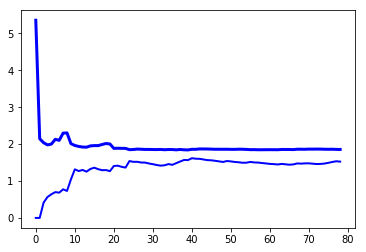

In [41]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

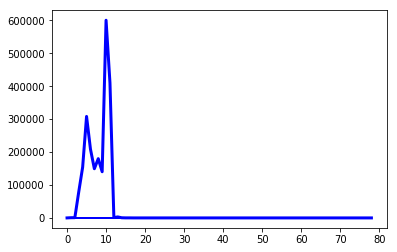

In [42]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)